# CRITT TPR-DB Data Analysis Demo


In [1]:
pip install tprdbreader

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import sys
import os.path
import glob
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from tprdbreader import readTPRDBtable_GCP

# The Session (each text = one text-production session)

In [3]:
# read SS tables
studies = ["BML12_re"]
ext = "ss"
sessions = readTPRDBtable_GCP(studies, ext, user = "TPRDB", verbose=1)

#sessions = TPRDB.readTPRDBtables(["BML12_re/Tables/"], "*ss", path="/data/critt/tprdb/TPRDB/", verbose = 1)

BML12_re	#sessions: 184	.ss:184


# Correlating two Variables

measures the strength of a linear association between two variables $X:\{x_1 ... x_n\}$ and $Y:\{y_1 ... y_n\}$.
A correlation value $r = 1$ means there is a perfect positive correlation and the value $r = -1$ means a perfect negataive correlation between $X$ and $Y$.

There are different ways to compute correlations: e.g. Pearson, Spaerman, Kendall. 


### Pearson correlation $r$

Requirements for Pearson's correlation coefficient:
- Scale of measurement should be interval or ratio
- Variables should be approximately normally distributed
- The association should be linear
- There should be no outliers in the data

Formula of Pearson correlation:  

$$r = \frac{\operatorname {cov} (X, Y)} {\sigma(X) \sigma(Y)}
    =\frac{\sum_i{(x_i - \bar{x_i}) (y_i - \bar{y_i})}} 
           {\sqrt{\sum_i{(x_i - \bar{x_i})^2}}{\sqrt{\sum_i{(y_i - \bar{y_i})^2}}}} 
$$



where: 

- $\bar{x}$: the mean of the $X$ values: $\frac{1}{n} \sum_i^n{x_i}$
- $\bar{y}$: the mean of the $Y$ values: $\frac{1}{n} \sum_i^n{y_i}$

    sometimes $\bar{x}$ is also written as $\mu$

   

### Spearman correlation $\rho$ (roh)
The Spearman correlation coefficient is defined as the Pearson correlation coefficient between the rank variables.
measure of rank correlation, dependence between the rankings of two variables.

$$\rho ={\frac {\operatorname {cov} ({\operatorname {R}} (X), {\operatorname {R}} (Y))}{\sigma_{{\operatorname {R}} (X)}\sigma _{\operatorname {R} (Y)}}}$$

where: 

- $\operatorname {cov} (\operatorname {R} (X), \operatorname {R} (Y))$: is the covariance of the rank variables
- $\sigma_{\operatorname {R} (X)}$ and $\sigma _{\operatorname {R} (Y)}$: are the standard deviations of the rank variables.




 ## Pause Time and Typing Time

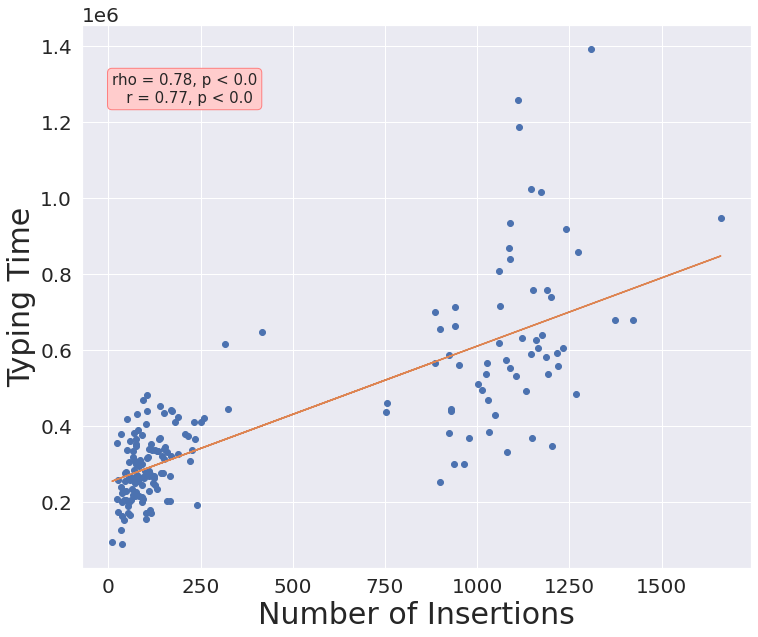

In [15]:
x = sessions['Ins']
y = sessions['Dur']

# Compute Spearman
corr1 = scipy.stats.spearmanr(x, y)
corr_coeff1 = str(round(corr1.correlation, 2))
corr_pValue1 = str(round(corr1.pvalue, 4))

# Compute Pearson
corr2 = scipy.stats.pearsonr(x, y)
corr_coeff2 = str(round(corr2[0], 2))
corr_pValue2 = str(round(corr2[1], 4))

# add to string
corr1_infoString = f"rho = {corr_coeff1}, p < {corr_pValue1}\n   r = {corr_coeff2}, p < {corr_pValue2}"

# font size  
plt.rcParams["figure.figsize"] = (12,10)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.xlabel("Number of Insertions", fontsize = 30)
plt.ylabel("Typing Time", fontsize = 30)


# plot r values
maxY = max(sessions['Dur']) - (max(sessions['Dur']) /10)
minX = min(sessions['Ins'])
plt.text(minX, maxY, corr1_infoString, fontsize = 15,
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
        )

# scatter plot 
plt.plot(x, y, 'o')


# Draw line 
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

# 

/usr/local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


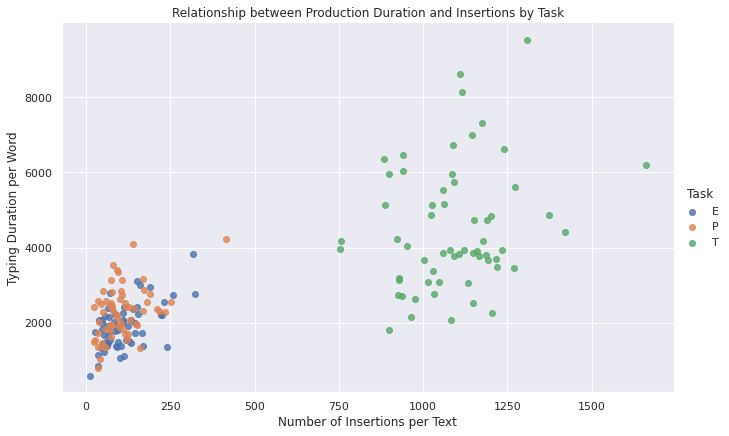

In [33]:

#aspect=.75
sns.set(font_scale = 1)
ax0 = sns.lmplot('Ins', 'nDur', data=sessions, hue='Task', fit_reg=False, height=6, aspect=1.6)
ax0.set(ylabel='Typing Duration per Word', xlabel='Number of Insertions per Text', title='Relationship between Production Duration and Insertions by Task')

plt.show()
